In [1]:
import pandas as pd

weather = pd.read_csv("weather.csv",index_col="DATE")

In [2]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1980-04-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",20.0,10.0,NaN,NaN,24.0,0.04,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1980-04-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",70.0,100.0,NaN,NaN,2242.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,1654.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,624.0,0.57,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.0,50.0,NaN,NaN,1548.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.08,NaN,NaN,0.67,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,13.65,NaN,NaN,0.12,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,19.69,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.630970
ACSH       0.630907
AWND       0.086287
FMTM       0.363751
PGTM       0.333710
PRCP       0.000063
SNOW       0.000063
SNWD       0.000126
TAVG       0.589492
TMAX       0.000063
TMIN       0.000063
TSUN       0.998177
WDF1       0.631222
WDF2       0.369218
WDF5       0.374434
WDFG       0.678167
WDFM       0.999937
WESD       0.624183
WSF1       0.631033
WSF2       0.369218
WSF5       0.374497
WSFG       0.635747
WSFM       0.999937
WT01       0.617584
WT02       0.941868
WT03       0.929927
WT04       0.982843
WT05       0.977438
WT06       0.991139
WT07       0.993213
WT08       0.860671
WT09       0.992836
WT11       0.999120
WT13       0.862682
WT14       0.944256
WT15       0.997360
WT16       0.683446
WT17       0.996229
WT18       0.943942
WT19       0.999937
WT21       0.999686
WT22       0.996921
WV01       0.999937
dtype: float64

In [4]:
vld_clms = weather.columns[null_pct < 0.05]
vld_clms

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [5]:
weather = weather[vld_clms].copy()

In [6]:
weather.columns = weather.columns.str.lower()

In [7]:
weather = weather.ffill()

In [8]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [9]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

In [10]:
weather.index

Index(['1980-04-01', '1980-04-02', '1980-04-03', '1980-04-04', '1980-04-05',
       '1980-04-06', '1980-04-07', '1980-04-08', '1980-04-09', '1980-04-10',
       ...
       '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
       '2023-10-20', '2023-10-21', '2023-10-22', '2023-10-23', '2023-10-24'],
      dtype='object', name='DATE', length=15912)

In [11]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1980-04-01', '1980-04-02', '1980-04-03', '1980-04-04',
               '1980-04-05', '1980-04-06', '1980-04-07', '1980-04-08',
               '1980-04-09', '1980-04-10',
               ...
               '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18',
               '2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22',
               '2023-10-23', '2023-10-24'],
              dtype='datetime64[ns]', name='DATE', length=15912, freq=None)

In [12]:
weather.index.year.value_counts().sort_index()

DATE
1980    275
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    297
Name: count, dtype: int64

<Axes: xlabel='DATE'>

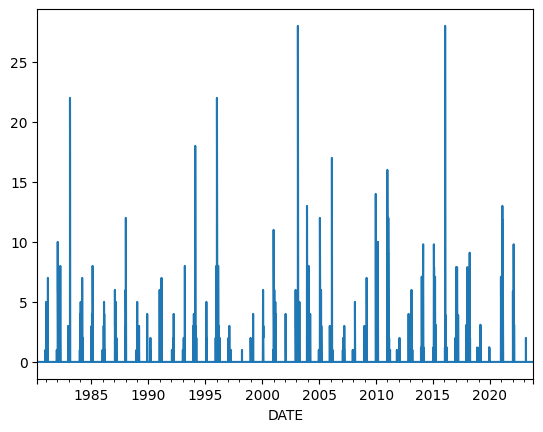

In [13]:
weather["snwd"].plot()

In [14]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-04-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,52.0,33.0,49.0
1980-04-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49.0,37.0,58.0
1980-04-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58.0,42.0,56.0
1980-04-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,56.0,45.0,58.0
1980-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58.0,44.0,61.0
...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0


In [15]:
weather = weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-04-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,52.0,33.0,49.0
1980-04-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49.0,37.0,58.0
1980-04-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58.0,42.0,56.0
1980-04-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.57,0.0,0.0,56.0,45.0,58.0
1980-04-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58.0,44.0,61.0
...,...,...,...,...,...,...,...,...
2023-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.67,0.0,0.0,64.0,60.0,66.0
2023-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,0.0,0.0,66.0,57.0,61.0
2023-10-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61.0,47.0,62.0


In [16]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [17]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [18]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
        # train on first 10 years
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual","prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [19]:
predictions = backtest(weather, rr, predictors)

In [20]:
predictions

,actual,prediction,diff
DATE,,,
1990-03-30,45.0,45.015728,0.015728
1990-03-31,44.0,49.328511,5.328511
1990-04-01,48.0,50.468676,2.468676
1990-04-02,46.0,52.745045,6.745045
1990-04-03,48.0,50.790173,2.790173
...,...,...,...
2023-10-20,66.0,68.625909,2.625909
2023-10-21,61.0,68.594439,7.594439
2023-10-22,62.0,61.379808,0.620192


In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"],predictions["prediction"])

5.1088323691185

In [22]:
def pct_diff(new, old):
    return (new - old)/old

def compute_rolling(weatehr, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label],weather[col])
    